In [479]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [5]:
pwd

'/Users/nikita'

In [327]:
table1=pd.read_csv('Desktop/mobileapp/device_demographics.csv')
table1.head()

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0


In [328]:
table2=pd.read_csv('Desktop/mobileapp/publishers.csv')
table2.head()

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


In [329]:
table3=pd.read_csv('Desktop/mobileapp/User_activity.txt')
table3.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
0,device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
1,app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
2,minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


In [30]:
# table1.shape (2772,2)
# table3.shape (3,22449)
# table2.shape 
table1.dtypes
# table2.dtypes

device_id     object
gender_id    float64
dtype: object

In [330]:
#Transposing data for a better view
table3_1=table3.transpose()
table3_1.head()


,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [331]:
# checking for duplicates in table 1
# table1['device_id'].duplicated().any() //returns false
duplicates=table1[table1.duplicated(['device_id', 'gender_id'])]
print(duplicates)

Empty DataFrame
Columns: [device_id, gender_id]
Index: []


In [332]:
# checking for duplicates in table 2
duplicates=table2[table2.duplicated(['app_name', 'Publisher'])]
print(duplicates)

                       app_name        Publisher
21         Walmart (Mobile App)         Wal-Mart
22  Microsoft Word (Mobile App)  Microsoft Sites


In [333]:
# dropping duplicates in table 2
table2.drop_duplicates(keep='first',inplace=True)
table2.shape

(21, 2)

In [334]:
# checking for duplicates in table 3
table3_1[table3_1.duplicated()]

,0,1,2
22440,B-52-23845,Snapchat (Mobile App),27.9342
22441,B-52-16587,Pinterest (Mobile App),14.6664
22442,B-52-36461,Facebook (Mobile App),439.7652
22443,B-52-29089,Yahoo Mail (Mobile App),900.6606
22444,B-52-13395,Netflix (Mobile App),1.1340000000000001
22445,B-52-8702,GroupMe (Mobile App),343.5264
22446,B-52-50977,Instagram (Mobile App),0.9072
22447,B-52-48431,YouTube (Mobile App),994.6692


In [335]:
# dropping duplicates in table 3
table3_1.drop_duplicates(keep='first',inplace=True)
table3_1.shape

(22441, 3)

In [336]:
table3_1.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [337]:
#Renaming Column names to 1st row data and dropping row at index = 0 in table 3
df3=table3_1.rename(columns=table3_1.iloc[0]).drop(table3_1.index[0])
df3.head()

,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502


In [338]:
# performing joins
merged_df1=pd.merge(table1,df3,on='device_id')
merged_df1.head()

,device_id,gender_id,app_name,minutes
0,B-52-23845,2.0,Snapchat (Mobile App),27.9342
1,B-52-23845,2.0,Pinterest (Mobile App),5.5188
2,B-52-23845,2.0,Instagram (Mobile App),867.132
3,B-52-23845,2.0,Tumblr (Mobile App),184.8042
4,B-52-23845,2.0,YouTube (Mobile App),69.6276


In [339]:
# performing joins
merged_df=pd.merge(merged_df1,table2,on='app_name')
merged_df.head()

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-23845,2.0,Snapchat (Mobile App),27.9342,"Snapchat, Inc"
1,B-52-36461,2.0,Snapchat (Mobile App),183.9348,"Snapchat, Inc"
2,B-52-29089,2.0,Snapchat (Mobile App),309.2418,"Snapchat, Inc"
3,B-52-30970,1.0,Snapchat (Mobile App),4.914,"Snapchat, Inc"
4,B-52-12407,2.0,Snapchat (Mobile App),306.5202,"Snapchat, Inc"


In [340]:
# Check for duplicates in joined dataset (if any)
merged_df[merged_df.duplicated()]

,device_id,gender_id,app_name,minutes,Publisher


In [341]:
# Sort the data based on columns – “app_name” and “minutes”.
merged_df.sort_values(by=['app_name','minutes'], inplace = True)
merged_df.head()

,device_id,gender_id,app_name,minutes,Publisher
19643,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
18792,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
20244,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
20265,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
19348,B-52-49381,2.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites


#  Transformation 2:

In [342]:
# intermediate file (lookup file) using group by on column 'app_name' and 'Publisher' take the mode across gender id
lookup1=merged_df.groupby(['app_name','Publisher'])['gender_id'].agg(pd.Series.mode).to_frame().reset_index()
lookup1.head()

,app_name,Publisher,gender_id
0,Amazon Mobile (Mobile App),Amazon Sites,2.0
1,Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
2,Facebook (Mobile App),Facebook,2.0
3,Facebook Messenger (Mobile App),Facebook,2.0
4,Google Play (Mobile App),Google Sites,2.0


In [343]:
lookup1.isna().any()

app_name     False
Publisher    False
gender_id    False
dtype: bool

In [344]:
merged_df.isna().any()

device_id    False
gender_id     True
app_name     False
minutes       True
Publisher    False
dtype: bool

In [345]:
lookup_merged=pd.merge(lookup1,merged_df,on='app_name',suffixes=['_lookup', '_orignal'])
lookup_merged.head()

,app_name,Publisher_lookup,gender_id_lookup,device_id,gender_id_orignal,minutes,Publisher_orignal
0,Amazon Mobile (Mobile App),Amazon Sites,2.0,B-52-52155,2.0,0.0378,Amazon Sites
1,Amazon Mobile (Mobile App),Amazon Sites,2.0,B-52-9082,2.0,0.0756,Amazon Sites
2,Amazon Mobile (Mobile App),Amazon Sites,2.0,B-52-20729,1.0,0.0756,Amazon Sites
3,Amazon Mobile (Mobile App),Amazon Sites,2.0,B-52-38817,2.0,0.0756,Amazon Sites
4,Amazon Mobile (Mobile App),Amazon Sites,2.0,B-52-49381,2.0,0.1134,Amazon Sites


In [346]:
lookup_merged.isna().any()

app_name             False
Publisher_lookup     False
gender_id_lookup     False
device_id            False
gender_id_orignal     True
minutes               True
Publisher_orignal    False
dtype: bool

In [347]:
# replace nan values 
lookup_merged.gender_id_orignal.fillna(lookup_merged.gender_id_lookup, inplace=True)
lookup_merged = lookup_merged.drop(columns='gender_id_lookup')
lookup_merged.rename(columns={'gender_id_orignal': 'gender_id'})

,app_name,Publisher_lookup,device_id,gender_id,minutes,Publisher_orignal
0,Amazon Mobile (Mobile App),Amazon Sites,B-52-52155,2.0,0.0378,Amazon Sites
1,Amazon Mobile (Mobile App),Amazon Sites,B-52-9082,2.0,0.0756,Amazon Sites
2,Amazon Mobile (Mobile App),Amazon Sites,B-52-20729,1.0,0.0756,Amazon Sites
3,Amazon Mobile (Mobile App),Amazon Sites,B-52-38817,2.0,0.0756,Amazon Sites
4,Amazon Mobile (Mobile App),Amazon Sites,B-52-49381,2.0,0.1134,Amazon Sites
...,...,...,...,...,...,...
22435,YouTube (Mobile App),Google Sites,B-52-17765,2.0,NaN,Google Sites
22436,YouTube (Mobile App),Google Sites,B-52-12350,2.0,NaN,Google Sites
22437,YouTube (Mobile App),Google Sites,B-52-30742,2.0,NaN,Google Sites
22438,YouTube (Mobile App),Google Sites,B-52-16701,2.0,NaN,Google Sites


In [348]:
lookup_merged.isna().any()

app_name             False
Publisher_lookup     False
device_id            False
gender_id_orignal    False
minutes               True
Publisher_orignal    False
dtype: bool

# Transformation 3:

In [349]:
lookup2=merged_df.groupby(['app_name','Publisher'])['minutes'].agg(pd.Series.median).to_frame()
lookup2.head()

,,minutes
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,47.1555
Amazon Music with Prime Music (Mobile App),Amazon Sites,34.3980
Facebook (Mobile App),Facebook,2764.6542
Facebook Messenger (Mobile App),Facebook,1349.6490
Google Play (Mobile App),Google Sites,57.6639


In [350]:
lookup2_merged=pd.merge(lookup2,lookup_merged,on='app_name',suffixes=['_lookup2', '_orignal'])
lookup2_merged.head()

,app_name,minutes_lookup2,Publisher_lookup,device_id,gender_id_orignal,minutes_orignal,Publisher_orignal
0,Amazon Mobile (Mobile App),47.1555,Amazon Sites,B-52-52155,2.0,0.0378,Amazon Sites
1,Amazon Mobile (Mobile App),47.1555,Amazon Sites,B-52-9082,2.0,0.0756,Amazon Sites
2,Amazon Mobile (Mobile App),47.1555,Amazon Sites,B-52-20729,1.0,0.0756,Amazon Sites
3,Amazon Mobile (Mobile App),47.1555,Amazon Sites,B-52-38817,2.0,0.0756,Amazon Sites
4,Amazon Mobile (Mobile App),47.1555,Amazon Sites,B-52-49381,2.0,0.1134,Amazon Sites


In [351]:
# replace nan values 
lookup2_merged.minutes_orignal.fillna(lookup2_merged.minutes_lookup2, inplace=True)
lookup2_merged = lookup2_merged.drop(columns='minutes_lookup2')
lookup2_merged.rename(columns={'minutes_orignal': 'minutes'},inplace=True)
lookup2_merged.rename(columns={'gender_id_orignal': 'gender_id'}, inplace=True)

In [352]:
lookup2_merged.rename(columns={'gender_id_orignal': 'gender_id'})

,app_name,Publisher_lookup,device_id,gender_id,minutes,Publisher_orignal
0,Amazon Mobile (Mobile App),Amazon Sites,B-52-52155,2.0,0.0378,Amazon Sites
1,Amazon Mobile (Mobile App),Amazon Sites,B-52-9082,2.0,0.0756,Amazon Sites
2,Amazon Mobile (Mobile App),Amazon Sites,B-52-20729,1.0,0.0756,Amazon Sites
3,Amazon Mobile (Mobile App),Amazon Sites,B-52-38817,2.0,0.0756,Amazon Sites
4,Amazon Mobile (Mobile App),Amazon Sites,B-52-49381,2.0,0.1134,Amazon Sites
...,...,...,...,...,...,...
22435,YouTube (Mobile App),Google Sites,B-52-17765,2.0,209.8656,Google Sites
22436,YouTube (Mobile App),Google Sites,B-52-12350,2.0,209.8656,Google Sites
22437,YouTube (Mobile App),Google Sites,B-52-30742,2.0,209.8656,Google Sites
22438,YouTube (Mobile App),Google Sites,B-52-16701,2.0,209.8656,Google Sites


In [353]:
lookup2_merged = lookup2_merged.drop(columns='Publisher_lookup')
lookup2_merged.rename(columns={'Publisher_orignal': 'Publisher'})

,app_name,device_id,gender_id,minutes,Publisher
0,Amazon Mobile (Mobile App),B-52-52155,2.0,0.0378,Amazon Sites
1,Amazon Mobile (Mobile App),B-52-9082,2.0,0.0756,Amazon Sites
2,Amazon Mobile (Mobile App),B-52-20729,1.0,0.0756,Amazon Sites
3,Amazon Mobile (Mobile App),B-52-38817,2.0,0.0756,Amazon Sites
4,Amazon Mobile (Mobile App),B-52-49381,2.0,0.1134,Amazon Sites
...,...,...,...,...,...
22435,YouTube (Mobile App),B-52-17765,2.0,209.8656,Google Sites
22436,YouTube (Mobile App),B-52-12350,2.0,209.8656,Google Sites
22437,YouTube (Mobile App),B-52-30742,2.0,209.8656,Google Sites
22438,YouTube (Mobile App),B-52-16701,2.0,209.8656,Google Sites


In [354]:
lookup2_merged.isna().any()

app_name             False
device_id            False
gender_id            False
minutes              False
Publisher_orignal    False
dtype: bool

# Transformation 4:

In [355]:
app_min=lookup2_merged.groupby('app_name')['minutes'].agg(['median','std'])
app_min.head()

,median,std
app_name,,
Amazon Mobile (Mobile App),47.1555,311.223196
Amazon Music with Prime Music (Mobile App),34.3980,449.620841
Facebook (Mobile App),2764.6542,3248.020616
Facebook Messenger (Mobile App),1349.6490,3039.701650
Google Play (Mobile App),57.6639,548.827380


In [356]:
app_min['median+std']=app_min['median']+app_min['std']
app_min.shape

(21, 3)

In [357]:
app_min.loc['Amazon Mobile (Mobile App)','median+std']

358.37869617823327

In [358]:
lookup2_merged.dtypes
lookup2_merged=lookup2_merged.astype({"minutes":'float64',"gender_id":'int'})

In [359]:
lookup2_merged.dtypes

app_name              object
device_id             object
gender_id              int64
minutes              float64
Publisher_orignal     object
dtype: object

In [360]:
filter1=lookup2_merged.apply((lambda row: True if(row['minutes']<=app_min.loc[row['app_name'],'median+std'] and row['minutes']>30.0) else False),axis=1)

In [361]:
trans4=lookup2_merged[filter1]
trans4.head()

,app_name,device_id,gender_id,minutes,Publisher_orignal
155,Amazon Mobile (Mobile App),B-52-36955,1,100.3590,Amazon Sites
156,Amazon Mobile (Mobile App),B-52-32471,2,101.3418,Amazon Sites
157,Amazon Mobile (Mobile App),B-52-10545,2,101.5308,Amazon Sites
158,Amazon Mobile (Mobile App),B-52-9595,2,101.6064,Amazon Sites
159,Amazon Mobile (Mobile App),B-52-21546,2,101.7198,Amazon Sites


In [400]:
trans4.sort_values(by=['app_name','minutes'],inplace = True)
trans4_1=trans4.reset_index(drop=True)
trans4_1.rename(columns={'Publisher_orignal': 'Publisher'}, inplace=True)

In [363]:
def Quartile1(x):
    return x.quantile(0.25)
def Quartile3(x):
    return x.quantile(0.75)
grouped_single = trans4_1.groupby('app_name').agg({'minutes': ['count','min','mean',Quartile1,'median',Quartile3,'std','max']})
grouped_single.head()

minutes                        \
                                             count      min         mean   
app_name                                                                   
Amazon Mobile (Mobile App)                     828  30.0888   119.505818   
Amazon Music with Prime Music (Mobile App)     126  32.2812   147.709200   
Facebook (Mobile App)                         1910  30.6180  2421.228930   
Facebook Messenger (Mobile App)               1912  30.6180  1396.553956   
Google Play (Mobile App)                      1844  30.0132   127.655345   

                                                                              \
                                            Quartile1     median   Quartile3   
app_name                                                                       
Amazon Mobile (Mobile App)                   49.28175    86.5809   167.35950   
Amazon Music with Prime Music (Mobile App)   53.97840    98.0343   210.82950   
Facebook (Mobile App)                       926.48745  2307.0852  3681.78615   
Facebook Messenger (Mobile App)             428.68980  1172.6883  2101.08465   
Google Play (Mobile App)                     53.51535    86.2407   162.72900   

                                                                    
                                                    std        max  
app_name                                                            
Amazon Mobile (Mobile App)                    84.114884   357.8526  
Amazon Music with Prime Music (Mobile App)   122.798296   477.7164  
Facebook (Mobile App)                       1683.694726  5995.2312  
Facebook Messenger (Mobile App)             1138.905491  4386.3120  
Google Play (Mobile App)                     109.966016   601.7382

In [364]:
def Quartile1(x):
    return x.quantile(0.25)
def Quartile3(x):
    return x.quantile(0.75)
grouped_double = trans4_1.groupby(['app_name','gender_id']).agg({'minutes': ['count','min','mean',Quartile1,'median',Quartile3,'std','max']})
grouped_double.head(6)

minutes           \
                                                       count      min   
app_name                                   gender_id                    
Amazon Mobile (Mobile App)                 1             304  30.2022   
                                           2             524  30.0888   
Amazon Music with Prime Music (Mobile App) 1              37  33.2262   
                                           2              89  32.2812   
Facebook (Mobile App)                      1             718  34.9272   
                                           2            1192  30.6180   

                                                                              \
                                                             mean  Quartile1   
app_name                                   gender_id                           
Amazon Mobile (Mobile App)                 1           121.036843   48.72420   
                                           2           118.617590   49.67865   
Amazon Music with Prime Music (Mobile App) 1           158.794735   64.44900   
                                           2           143.100607   49.55580   
Facebook (Mobile App)                      1          2453.191624  949.74390   
                                           2          2401.976233  907.12440   

                                                                             \
                                                         median   Quartile3   
app_name                                   gender_id                          
Amazon Mobile (Mobile App)                 1            92.9880   172.21680   
                                           2            84.9744   165.90420   
Amazon Music with Prime Music (Mobile App) 1           110.0358   213.00300   
                                           2            95.8986   204.30900   
Facebook (Mobile App)                      1          2327.5539  3643.06005   
                                           2          2291.7951  3700.28925   

                                                                              
                                                              std        max  
app_name                                   gender_id                          
Amazon Mobile (Mobile App)                 1            84.443771   349.9524  
                                           2            83.991499   357.8526  
Amazon Music with Prime Music (Mobile App) 1           121.137675   443.5830  
                                           2           123.868258   477.7164  
Facebook (Mobile App)                      1          1705.788064  5986.6884  
                                           2          1670.670339  5995.2312

In [406]:
grouped_data=grouped_double
grouped_data.to_csv('grouped_data1.csv',header=['count','min','mean','Quartile1','median','Quartile3','std','max'])

In [237]:
# s1=pd.pivot_table(grouped_double, index=['app_name'], values= 'minutes', aggfunc= [np.mean, np.median, min, max, np.std])
# s1.head()

# Transformation 6:

In [384]:
trans6=trans4_1

In [385]:
trans6_1 =trans6.groupby('app_name')['minutes'].sum().reset_index(name='Total_minutes')
# trans6['Total_devices']=trans6.groupby('app_name')['device_id'].count().to_frame()

In [386]:
trans6_2=trans6.groupby('app_name')['device_id'].count().reset_index(name='Total_devices')

In [387]:
trans6=pd.merge(trans6_1,trans6_2,on="app_name")
trans6

,app_name,Total_minutes,Total_devices
0,Amazon Mobile (Mobile App),9.895082e+04,828
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126
2,Facebook (Mobile App),4.624547e+06,1910
3,Facebook Messenger (Mobile App),2.670211e+06,1912
4,Google Play (Mobile App),2.353965e+05,1844
5,Google Search (Mobile App),6.041270e+05,1747
6,GroupMe (Mobile App),1.206236e+04,92
7,Instagram (Mobile App),5.081823e+05,1092
8,Kindle (Mobile App),4.449226e+04,129
9,Microsoft Word (Mobile App),1.804761e+03,36


In [388]:
trans6['Avg_time_spend_per_device']=trans6.apply(lambda row: row['Total_minutes']/row['Total_devices'],axis=1)
trans6.head()

,app_name,Total_minutes,Total_devices,Avg_time_spend_per_device
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956
4,Google Play (Mobile App),2.353965e+05,1844,127.655345


# Transformation:7

In [389]:
trans7=trans6.copy()


In [390]:
trans7_1=trans6.copy()
trans7_1.head()

,app_name,Total_minutes,Total_devices,Avg_time_spend_per_device
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956
4,Google Play (Mobile App),2.353965e+05,1844,127.655345


In [391]:
trans7['Rank(duration based)'] = trans7['Total_minutes'].rank(method='max',ascending=False)
trans7.to_csv('grouped_rank1.csv')

In [392]:
trans7_1['Rank(user based)'] = trans7_1['Total_devices'].rank(method='max',ascending=False)
trans7_1.head()

,app_name,Total_minutes,Total_devices,Avg_time_spend_per_device,Rank(user based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,7.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,2.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0


In [394]:
trans7_1.to_csv('grouped_rank2.csv',)

In [401]:
trans8=trans4_1.groupby('Publisher')['device_id'].count().reset_index(name='Total_devices')

In [402]:
trans8['Rank'] = trans8['Total_devices'].rank(method='max',ascending=False)

In [403]:
trans8.sort_values(by=['Rank'], inplace = True)
trans8.to_csv('grouped_rank3.csv')

# Loading the Target files:

# Target system A: (Structured tabulated data)

In [418]:
# a. Output for step 10
outputA=pd.read_csv('grouped_data1.csv',index_col=0)
print(tabulate(outputA.head(), headers='keys', tablefmt='psql'))

+--------------------------------------------+-------------+---------+---------+----------+-------------+-----------+-------------+-----------+----------+
| app_name                                   |   gender_id |   count |     min |     mean |   Quartile1 |    median |   Quartile3 |       std |      max |
|--------------------------------------------+-------------+---------+---------+----------+-------------+-----------+-------------+-----------+----------|
| Amazon Mobile (Mobile App)                 |           1 |     304 | 30.2022 |  121.037 |     48.7242 |   92.988  |     172.217 |   84.4438 |  349.952 |
| Amazon Mobile (Mobile App)                 |           2 |     524 | 30.0888 |  118.618 |     49.6786 |   84.9744 |     165.904 |   83.9915 |  357.853 |
| Amazon Music with Prime Music (Mobile App) |           1 |      37 | 33.2262 |  158.795 |     64.449  |  110.036  |     213.003 |  121.138  |  443.583 |
| Amazon Music with Prime Music (Mobile App) |           2 |      89 |

In [421]:
outputA.head()

,gender_id,count,min,mean,Quartile1,median,Quartile3,std,max
app_name,,,,,,,,,
Amazon Mobile (Mobile App),1,304,30.2022,121.036843,48.72420,92.9880,172.21680,84.443771,349.9524
Amazon Mobile (Mobile App),2,524,30.0888,118.617590,49.67865,84.9744,165.90420,83.991499,357.8526
Amazon Music with Prime Music (Mobile App),1,37,33.2262,158.794735,64.44900,110.0358,213.00300,121.137675,443.5830
Amazon Music with Prime Music (Mobile App),2,89,32.2812,143.100607,49.55580,95.8986,204.30900,123.868258,477.7164
Facebook (Mobile App),1,718,34.9272,2453.191624,949.74390,2327.5539,3643.06005,1705.788064,5986.6884


In [324]:
engine = create_engine('sqlite://', echo=False)

In [411]:
outputA.to_sql('table1', con=engine)


In [413]:
engine.execute("SELECT * FROM table1 where app_name='Facebook (Mobile App)'").fetchall()

[('Facebook (Mobile App)', 1, 718, 34.9272, 2453.19162367688, 949.7439, 2327.5539, 3643.06005, 1705.7880644386958, 5986.6884),
 ('Facebook (Mobile App)', 2, 1192, 30.618, 2401.976233389262, 907.1244, 2291.7951000000003, 3700.28925, 1670.670338681157, 5995.2312)]

In [420]:
outputb=pd.read_csv('grouped_rank1.csv',index_col=0)
outputb.head()

,app_name,Total_minutes,Total_devices,Avg_time_spend_per_device,Rank(duration based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,10.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,1.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,2.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,7.0


In [422]:
outputc=pd.read_csv('grouped_rank2.csv',index_col=0)
outputc.head()

,app_name,Total_minutes,Total_devices,Avg_time_spend_per_device,Rank(user based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,7.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,2.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,1.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,3.0


In [423]:
outputd=pd.read_csv('grouped_rank3.csv',index_col=0)
outputd.head()

,Publisher,Total_devices,Rank
2,Google Sites,5345,1.0
1,Facebook,4914,2.0
0,Amazon Sites,1083,3.0
7,"Snapchat, Inc",823,4.0
5,Oath,591,5.0


# Target System B: (Graphs)

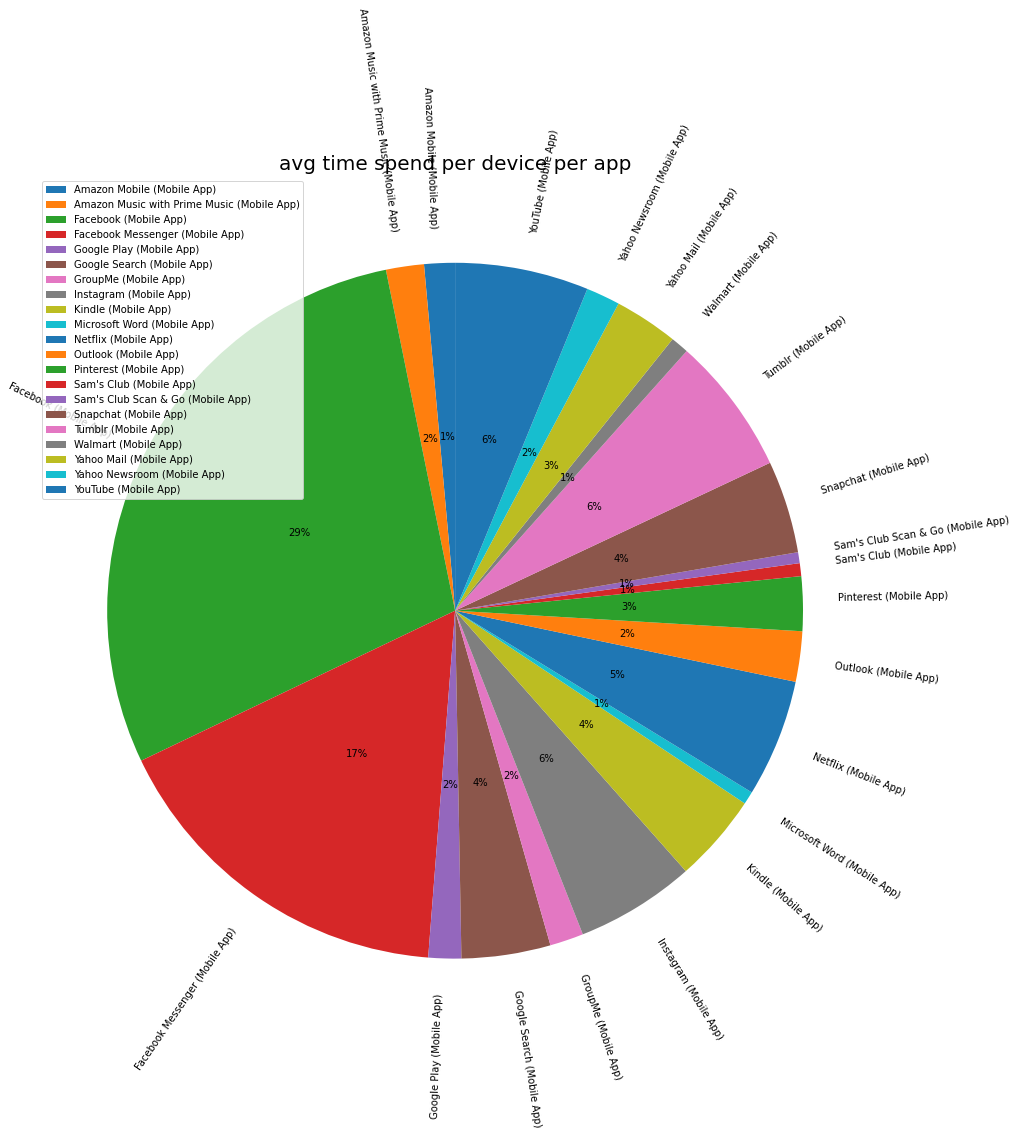

In [496]:
# a.Pie chart to show avg time spend per device per app
data=trans6.groupby('app_name')['Avg_time_spend_per_device'].sum()
dataf=data.to_frame()
pie, ax = plt.subplots(figsize=[15,16])
labels = data.keys()
ax.axis('equal')
plt.pie(x=data, autopct="%.f%%", explode=None, labels=labels, pctdistance=0.5,rotatelabels =True, startangle=90)
plt.title("avg time spend per device per app", fontsize=20);
plt.legend(data.keys(), loc="best")
plt.show()
pie.savefig("Avg.png")

In [483]:
data2=trans4.groupby(['app_name','gender_id'])['device_id'].count().reset_index(name='Total_Users')
data2.head()

,app_name,gender_id,Total_Users
0,Amazon Mobile (Mobile App),1,304
1,Amazon Mobile (Mobile App),2,524
2,Amazon Music with Prime Music (Mobile App),1,37
3,Amazon Music with Prime Music (Mobile App),2,89
4,Facebook (Mobile App),1,718


Text(0, 0.5, '')

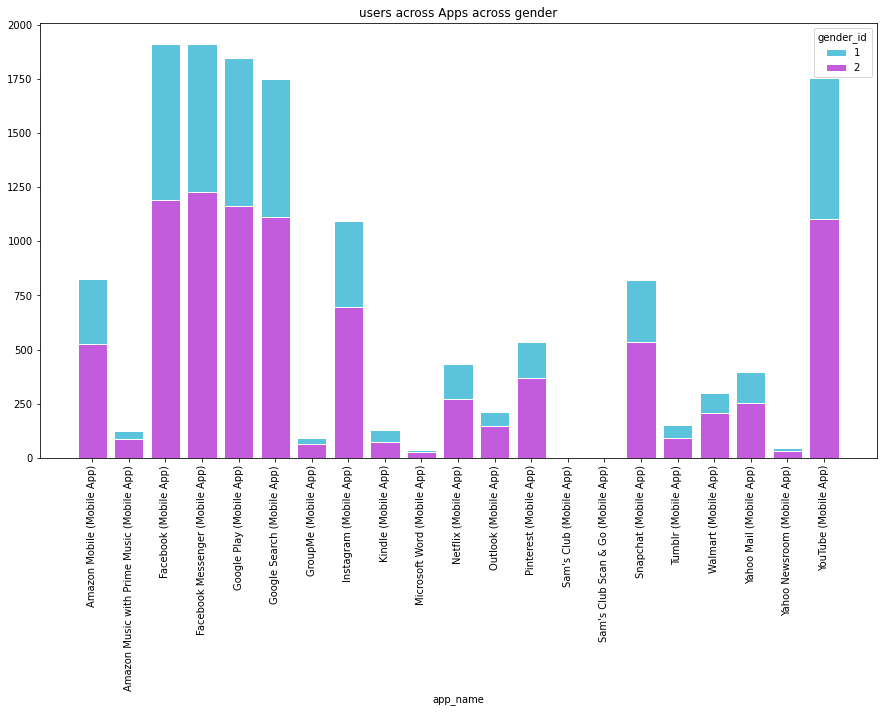

In [492]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
ax = sns.histplot(
    data2,
    x='app_name',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='Total_Users',
    hue='gender_id',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8
)

ax.set_title('users across Apps across gender')
# Remove 'Count' ylabel.
ax.set_ylabel(None)